In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 작업 디렉토리 변경
import os
print(os.getcwd(), end=' -> ')
os.chdir('/content/drive/MyDrive/[2025-1] Pattern Recognition/project')
print(os.getcwd())

/content -> /content/drive/MyDrive/[2025-1] Pattern Recognition/project


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# CSV 파일 불러오기
df = pd.read_csv('train.csv')
df.head()


,id,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,data_channel,weekday,shares,y
0,17335,9.0,409.0,0.501326,1.0,0.587361,23.0,2.0,11.0,0.0,...,-0.1875,-0.1,0.50,0.500,0.00,0.500,Lifestyle,NaN,801,0
1,21242,10.0,317.0,0.725086,1.0,0.830097,6.0,3.0,NaN,21.0,...,-0.6000,NaN,0.00,0.000,0.50,0.000,Lifestyle,Tuesday,426,0
2,9448,11.0,447.0,0.584091,1.0,0.730104,NaN,1.0,1.0,1.0,...,-0.5000,-0.1,0.75,0.125,0.25,0.125,World,Friday,2400,1
3,36797,13.0,143.0,0.638298,NaN,0.787500,3.0,2.0,NaN,0.0,...,0.0000,0.0,1.00,NaN,0.50,0.500,Social Media,NaN,1100,0
4,29504,17.0,576.0,0.524412,1.0,0.714286,8.0,3.0,NaN,0.0,...,-1.0000,-0.1,0.00,0.000,0.50,0.000,World,Wednesday,1500,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22200 entries, 0 to 22199
Data columns (total 49 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            22200 non-null  int64  
 1   n_tokens_title                20000 non-null  float64
 2   n_tokens_content              20054 non-null  float64
 3   n_unique_tokens               19942 non-null  float64
 4   n_non_stop_words              20017 non-null  float64
 5   n_non_stop_unique_tokens      19944 non-null  float64
 6   num_hrefs                     19967 non-null  float64
 7   num_self_hrefs                19920 non-null  float64
 8   num_imgs                      19986 non-null  float64
 9   num_videos                    19906 non-null  float64
 10  average_token_length          19987 non-null  float64
 11  num_keywords                  19955 non-null  float64
 12  kw_min_min                    19984 non-null  float64
 13  k

In [ ]:
df.describe()

,id,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,y
count,22200.000000,20000.000000,20054.000000,19942.000000,20017.000000,19944.000000,19967.000000,19920.000000,19986.000000,19906.000000,...,20033.000000,19916.000000,19926.000000,19997.000000,19928.000000,19967.000000,19934.000000,19951.000000,22200.000000,22200.000000
mean,19856.270045,10.387150,543.920614,0.530611,0.970175,0.672893,10.840337,3.303263,4.473431,1.248669,...,0.755952,-0.259972,-0.523223,-0.107647,0.284772,0.070169,0.342966,0.155305,3459.794865,0.495676
std,11469.556277,2.105585,460.694982,0.138709,0.170108,0.155004,11.024976,3.944523,8.092647,4.087507,...,0.248262,0.127974,0.289365,0.096059,0.327151,0.264686,0.188498,0.225603,12767.254516,0.499993
min,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,22.000000,0.000000
25%,9948.750000,9.000000,246.000000,0.471005,1.000000,0.626836,4.000000,1.000000,1.000000,0.000000,...,0.600000,-0.329167,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,948.000000,0.000000
50%,19931.000000,10.000000,409.000000,0.539683,1.000000,0.691228,7.000000,3.000000,1.000000,0.000000,...,0.800000,-0.253718,-0.500000,-0.100000,0.144444,0.000000,0.500000,0.000000,1400.000000,0.000000
75%,29780.250000,12.000000,715.750000,0.609865,1.000000,0.754545,14.000000,4.000000,4.000000,1.000000,...,1.000000,-0.187500,-0.300000,-0.050000,0.500000,0.138600,0.500000,0.250000,2800.000000,1.000000
max,39644.000000,19.000000,7413.000000,1.000000,1.000000,1.000000,186.000000,116.000000,108.000000,91.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000,1.000000


# 데이터 전처리

(0.0, 20000.0)

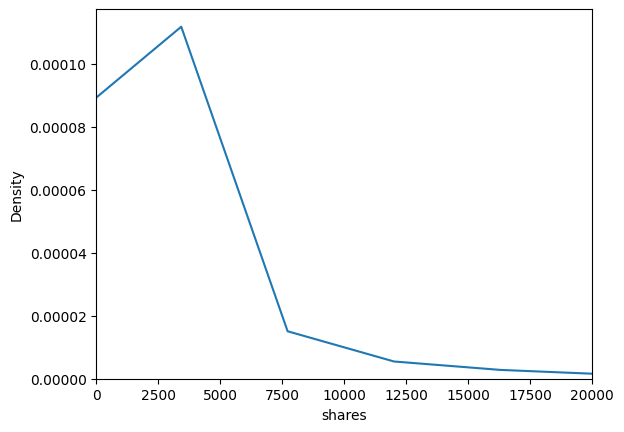

In [ ]:
# 공유 수 분포 그래프
sns.kdeplot(df['shares'])
plt.xlim(0, 20000)

In [ ]:
# 이상치 제거 비율에 따른 수치 통계

from scipy.stats import skew, kurtosis

quantiles = [1.0, 0.998, 0.995, 0.99, 0.98, 0.975]
summary_list = []

for q in quantiles:
    threshold = df['shares'].quantile(q)
    temp = df[df['shares'] <= threshold]['shares']

    summary = {
        'quantile': q,
        'count': temp.count(),
        'mean': temp.mean(),
        'std': temp.std(),
        'skew': skew(temp),
        'kurtosis': kurtosis(temp),
        'min': temp.min(),
        'max': temp.max()
    }

    summary_list.append(summary)

summary_df = pd.DataFrame(summary_list)
print(summary_df)


   quantile  count         mean           std       skew     kurtosis  min  \
0     1.000  22200  3459.794865  12767.254516  34.564296  1777.645277   22   
1     0.998  22155  3075.768269   5730.182933   6.628787    59.428030   22   
2     0.995  22090  2891.559439   4596.721530   5.102655    34.846652   22   
3     0.990  21978  2694.451224   3655.563807   3.813214    18.020655   22   
4     0.980  21760  2468.876333   2873.139893   3.020613    10.499472   22   
5     0.975  21648  2384.638258   2629.522184   2.816273     8.936662   22   

      max  
0  843300  
1   86200  
2   53100  
3   32100  
4   20400  
5   17300  


(0.0, 8500.0)

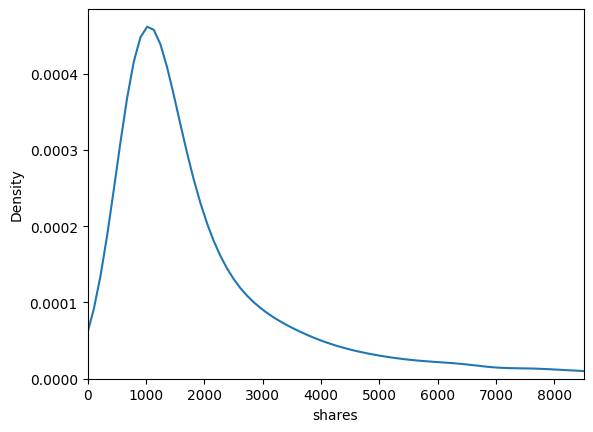

In [ ]:
threshold = df['shares'].quantile(0.98)
df = df[df['shares'] <= threshold]

sns.kdeplot(df['shares'])
plt.xlim(0, 8500)

In [ ]:
# 가장 많이 등장한 값이 전체에서 차지하는 비율 top 10
top_ratio_dict = {}

for col in df.columns:
    most_common = df[col].value_counts(dropna=False).iloc[0]
    total = len(df)
    ratio = most_common / total
    top_ratio_dict[col] = ratio

top_10 = sorted(top_ratio_dict.items(), key=lambda x: x[1], reverse=True)[:10]

for col, ratio in top_10:
    print(f"{col}: {ratio:.2%}")

kw_max_max: 68.35%
num_videos: 56.65%
kw_min_min: 51.76%
y: 51.45%
abs_title_subjectivity: 46.69%
title_sentiment_polarity: 45.63%
abs_title_sentiment_polarity: 45.57%
num_imgs: 41.48%
title_subjectivity: 40.89%
kw_min_avg: 38.98%


In [ ]:
# 중복 값이 많은 변수들을 자세히 살펴보자
df['kw_min_min'].value_counts(dropna=False).head(5)

,count
kw_min_min,
-1.0,11263
4.0,5955
217.0,2323
NaN,2167
0.0,34


In [ ]:
df['kw_max_max'].value_counts(dropna=False).head(5)

,count
kw_max_max,
843300.0,14873
NaN,2193
690400.0,1982
617900.0,1115
69100.0,645


In [ ]:
df['n_non_stop_words_rounded'] = df['n_non_stop_words'].round(3)  # 소수 셋째 자리까지 반올림
df['n_non_stop_words_rounded'].value_counts(dropna=False)

,count
n_non_stop_words_rounded,
1.0,19041
NaN,2139
0.0,580


In [ ]:
# 많은 값들이 같은 값을 가지므로 삭제한다
df.drop(columns=['kw_min_min'], axis=1, inplace=True)
df.drop(columns=['kw_max_max'], axis=1, inplace=True)
df.drop(columns=['n_non_stop_words'], axis=1, inplace=True)
df.drop(columns=['n_non_stop_words_rounded'], axis=1, inplace=True)

In [ ]:
# 'id'는 각 샘플마다 고유한 값을 가진다. 학습에 사용할 값이 아니므로 삭제한다
df.drop(columns=['id'], axis=1, inplace=True)

In [ ]:
# # Scatter plot

X = df.drop(columns=['shares', 'y'])
X = X.select_dtypes(include=['number']) # 숫자형만 필터링
y = df['shares']
target = 'shares'

# # 시각화
# plt.figure(figsize=(18, 20))

# for i, feature in enumerate(X.columns):
#     plt.subplot(7, 6, i + 1)
#     plt.tight_layout(pad=1.5)
#     plt.scatter(X[feature], y, alpha=0.3)
#     plt.xlabel(feature)
#     plt.ylabel(target)

# plt.tight_layout()
# plt.show()

In [ ]:
# winsorize
from scipy.stats.mstats import winsorize
feature_with_outliers = ["n_tokens_content", "num_hrefs", "num_self_hrefs", "num_imgs", "num_videos", "kw_max_min", "kw_avg_min", "kw_max_avg", "kw_avg_avg", "self_reference_min_shares", "self_reference_max_shares", "self_reference_avg_sharess", "global_rate_positive_words", "global_rate_negative_words", "avg_positive_polarity", "min_positive_polarity"]

# Define the percentile thresholds for Winsorization
lower_percentile = 0.0
upper_percentile = 0.0002

# Apply Winsorization to each input variable
for feature in X.columns:
    if feature in feature_with_outliers:
      X[feature] = winsorize(X[feature], limits=(lower_percentile, upper_percentile))


In [ ]:
# 요일별 shares의 평균, 최댓값, 최솟값
weekday_stats = df.groupby('weekday')['shares'].agg(
    avg_shares=lambda x: round(x.mean(), 2),
    max_shares='max',
    min_shares='min'
).reset_index()

weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_stats['weekday'] = pd.Categorical(weekday_stats['weekday'], categories=weekday_order, ordered=True)
weekday_stats = weekday_stats.sort_values('weekday')
print(weekday_stats)

     weekday  avg_shares  max_shares  min_shares
1     Monday     2384.82       20300          43
5    Tuesday     2355.24       20400          42
6  Wednesday     2354.53       20300          48
4   Thursday     2357.35       20400          22
0     Friday     2436.35       20400          28
2   Saturday     3117.37       19800          49
3     Sunday     3060.14       20000         171


In [ ]:
# 결측치 처리
for col in df.columns:
    if df[col].dtype == 'object': # 범주형 → 최빈값
        df[col] = df[col].fillna(df[col].mode())
    else: # 숫자형 → 중간값
        df[col] = df[col].fillna(df[col].median())

In [ ]:
# is_weekend 변수 추가
df['is_weekend'] = df['weekday'].isin(['Saturday', 'Sunday']).astype(int)

# 범주형 데이터 One-Hot Encoding
df = pd.get_dummies(df, columns=['data_channel', 'weekday'], drop_first=True)

# RandomForeset_gscv_v0

In [ ]:
from sklearn.model_selection import KFold

# 커스텀 평가 지표 정의
def my_scorer(estimator, X, y_true):
    y_pred = estimator.predict(X)
    y_proba = estimator.predict_proba(X)

    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_proba[:, 1])

    result = (accuracy + f1 + roc_auc) / 3
    return result

# KFold 설정
random_state = 42
kf = KFold(n_splits=5, shuffle=True, random_state=random_state)

# 전처리 (train, val 나누기) (정규화)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21760 entries, 0 to 22199
Data columns (total 55 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   n_tokens_title                21760 non-null  float64
 1   n_tokens_content              21760 non-null  float64
 2   n_unique_tokens               21760 non-null  float64
 3   n_non_stop_unique_tokens      21760 non-null  float64
 4   num_hrefs                     21760 non-null  float64
 5   num_self_hrefs                21760 non-null  float64
 6   num_imgs                      21760 non-null  float64
 7   num_videos                    21760 non-null  float64
 8   average_token_length          21760 non-null  float64
 9   num_keywords                  21760 non-null  float64
 10  kw_max_min                    21760 non-null  float64
 11  kw_avg_min                    21760 non-null  float64
 12  kw_min_max                    21760 non-null  float64
 13  kw_avg

In [ ]:
from imblearn.over_sampling import SMOTE

# X, y 분리
X = df.drop(columns=['shares', 'y'])
y = df['y']

# train/val 분리
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, random_state=42)

# 정규화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# 오버샘플링
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

# 커스텀 평가 지표 정의
def my_scorer(estimator, X, y_true):
    y_pred = estimator.predict(X)
    y_proba = estimator.predict_proba(X)

    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_proba[:, 1])

    result = (accuracy + f1 + roc_auc) / 3
    return result

# KFold 설정
random_state = 42
kf = KFold(n_splits=5, shuffle=True, random_state=random_state)

# 모델 학습시키기

In [ ]:
!pip install scikeras

^C


## 1. LSTM 모델

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from scikeras.wrappers import KerasClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.base import BaseEstimator, ClassifierMixin
import joblib

# LSTM 입력 형태로 reshape (샘플 수, 시퀀스 길이, 특성 수)
X_train_lstm = X_train_res.reshape(-1, 1, X.shape[1])
y_train_lstm = y_train_res # y는 그대로 사용
X_val_lstm = X_val_scaled.reshape(-1, 1, X.shape[1])

# 모델 빌더 함수
def create_lstm_model(units1=64, units2=32, dropout_rate=0.2):
    model = Sequential()
    model.add(LSTM(units1, return_sequences=True, input_shape=(1, X.shape[1])))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(units2))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# KerasClassifier 래핑
lstm_model = KerasClassifier(
    model=create_lstm_model,
    epochs=20,
    batch_size=32,
    verbose=0
)

# LSTMWrapperForStacking 클래스 코드
from sklearn.base import BaseEstimator, ClassifierMixin

class LSTMWrapperForStacking(BaseEstimator, ClassifierMixin):
    def __init__(self, lstm_model):
        self.lstm_model = lstm_model

    def fit(self, X, y):
        X_lstm = X.reshape(-1, 1, X.shape[1])
        self.lstm_model.fit(X_lstm, y)
        self.classes_ = np.unique(y)
        return self

    def predict(self, X):
        X_lstm = X.reshape(-1, 1, X.shape[1])
        return self.lstm_model.predict(X_lstm)

    def predict_proba(self, X):
        X_lstm = X.reshape(-1, 1, X.shape[1])
        return self.lstm_model.predict_proba(X_lstm)

# 그리고 래핑해서 변수 생성
lstm_wrapped = LSTMWrapperForStacking(lstm_model)


# 학습
print("\n" + "=" * 50)
print("LSTM 모델 학습 중...")
print("=" * 50)
lstm_model.fit(X_train_lstm, y_train_lstm)

# 모델 저장
joblib.dump(lstm_model, 'best_lstm_model.pkl')
print("\n[INFO] 모델이 'best_lstm_model.pkl'로 저장되었습니다.")

# 예측 및 평가
y_prob = lstm_model.predict_proba(X_val_lstm)[:, 1]
threshold = 0.45
y_pred = (y_prob >= threshold).astype(int)

acc = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
auc = roc_auc_score(y_val, y_prob)
average_score = np.mean([acc, f1, auc])

print("\n[RESULT] LSTM Performance:")
print(f"Accuracy      : {acc:.6f}")
print(f"F1 Score      : {f1:.6f}")
print(f"AUC           : {auc:.6f}")
print(f"Average Score : {average_score:.6f}")



LSTM 모델 학습 중...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



[INFO] 모델이 'best_lstm_model.pkl'로 저장되었습니다.

[RESULT] LSTM Performance:
Accuracy      : 0.618796
F1 Score      : 0.636901
AUC           : 0.678051
Average Score : 0.644583


## 2, xgboost + lightGBM + random forest

In [ ]:
# xgb boost
xgb_model = XGBClassifier(
    learning_rate=0.05, max_depth=5, n_estimators=200,
    subsample=0.8, colsample_bytree=1.0, random_state=42, use_label_encoder=False, eval_metric='logloss'
)

# light GBM
lgbm_model = LGBMClassifier(
    learning_rate=0.05019492506075167, max_depth=6, n_estimators=379,
    num_leaves=141, feature_fraction=0.8488251044495548, random_state=42, verbose=-1
)

# random forest
rf_model = RandomForestClassifier(
    n_estimators=200, max_depth=10, max_features='log2', random_state=42
)

# 메타 모델
meta_model = LogisticRegression(random_state=42, max_iter=1000)

# 스태킹 모델
stacking_model = StackingClassifier(
    estimators=[
        ('xgb', xgb_model),
        ('lgbm', lgbm_model),
        ('rf', rf_model)
    ],
    final_estimator=meta_model,
    cv=5,
    n_jobs=-1,
    passthrough=False
)

In [ ]:
# 학습
print("\n" + "=" * 50)
print("stacking 모델 학습 중...")
print("=" * 50)
stacking_model.fit(X_train_res, y_train_res)

# 모델 저장
import joblib
joblib.dump(stacking_model, 'best_stacking_model.pkl')
print("\n[INFO] 모델이 'best_stacking_model.pkl'로 저장되었습니다.")

# 예측 및 평가
y_prob = stacking_model.predict_proba(X_val_scaled)[:, 1]
threshold = 0.45
y_pred = (y_prob >= threshold).astype(int)

acc = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
auc = roc_auc_score(y_val, y_prob)
average_score = np.mean([acc, f1, auc])

print("\n[RESULT] Performance:")
print(f"Accuracy      : {acc:.6f}")
print(f"F1 Score      : {f1:.6f}")
print(f"AUC           : {auc:.6f}")
print(f"Average Score : {average_score:.6f}")


stacking 모델 학습 중...

[INFO] 모델이 'best_stacking_model.pkl'로 저장되었습니다.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



[RESULT] Performance:
Accuracy      : 0.648897
F1 Score      : 0.665792
AUC           : 0.725004
Average Score : 0.679898


# Ensemble

In [ ]:
# 모델 불러오기
import joblib
lstm_model = joblib.load("best_lstm_model.pkl")
stacking_model = joblib.load("best_stacking_model.pkl")

## 1. soft voting

In [ ]:
y_prob_lstm = lstm_model.predict_proba(X_val_lstm)[:, 1]
y_prob_stack = stacking_model.predict_proba(X_val_scaled)[:, 1]

final_prob = (y_prob_lstm + y_prob_stack) / 2

threshold = 0.45
y_pred = (final_prob >= threshold).astype(int)

acc = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
auc = roc_auc_score(y_val, final_prob)
average_score = np.mean([acc, f1, auc])

print("\n[RESULT] Soft Voting Ensemble Performance:")
print(f"Accuracy      : {acc:.6f}")
print(f"F1 Score      : {f1:.6f}")
print(f"AUC           : {auc:.6f}")
print(f"Average Score : {average_score:.6f}")


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



[RESULT] Soft Voting Ensemble Performance:
Accuracy      : 0.636029
F1 Score      : 0.655802
AUC           : 0.708724
Average Score : 0.666852


# 2. weighted sum ensemble

In [ ]:
# 개별 모델 학습
lstm_model.fit(X_train_lstm, y_train_res)
xgb_model.fit(X_train_res, y_train_res)
lgbm_model.fit(X_train_res, y_train_res)
rf_model.fit(X_train_res, y_train_res)

# 확률 예측
y_prob_lstm = lstm_model.predict_proba(X_val_lstm)[:, 1]
y_prob_xgb = xgb_model.predict_proba(X_val_scaled)[:, 1]
y_prob_lgbm = lgbm_model.predict_proba(X_val_scaled)[:, 1]
y_prob_rf = rf_model.predict_proba(X_val_scaled)[:, 1]

# 개별 모델 평가 함수
def evaluate_model(name, y_true, y_prob):
    y_pred = (y_prob >= 0.45).astype(int)
    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_prob)
    avg = np.mean([acc, f1, auc])
    print(f"\n[{name}] Performance:")
    print(f"Accuracy      : {acc:.6f}")
    print(f"F1 Score      : {f1:.6f}")
    print(f"AUC           : {auc:.6f}")
    print(f"Average Score : {avg:.6f}")
    return acc, f1, auc, avg

# 각 모델 성능 출력
evaluate_model("LSTM",   y_val, y_prob_lstm)
evaluate_model("XGBoost", y_val, y_prob_xgb)
evaluate_model("LightGBM", y_val, y_prob_lgbm)
evaluate_model("Random Forest", y_val, y_prob_rf)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:58:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



[LSTM] Performance:
Accuracy      : 0.626379
F1 Score      : 0.635262
AUC           : 0.681632
Average Score : 0.647758

[XGBoost] Performance:
Accuracy      : 0.649127
F1 Score      : 0.667682
AUC           : 0.721321
Average Score : 0.679377

[LightGBM] Performance:
Accuracy      : 0.653493
F1 Score      : 0.662941
AUC           : 0.717463
Average Score : 0.677966

[Random Forest] Performance:
Accuracy      : 0.636029
F1 Score      : 0.672050
AUC           : 0.718346
Average Score : 0.675475


(0.6360294117647058,
 0.6720496894409937,
 np.float64(0.7183457429870079),
 np.float64(0.6754749480642358))

In [ ]:
# 가중치 설정
w_lstm  = 0.22
w_xgb  = 0.26
w_lgbm = 0.26
w_rf   = 0.26

# 가중 평균 계산
y_prob_weighted = (
    w_lstm  * y_prob_lstm +
    w_xgb  * y_prob_xgb +
    w_lgbm * y_prob_lgbm +
    w_rf   * y_prob_rf
)

# 최종 예측
y_pred_weighted = (y_prob_weighted >= 0.45).astype(int)

# 성능 평가
acc = accuracy_score(y_val, y_pred_weighted)
f1 = f1_score(y_val, y_pred_weighted)
auc = roc_auc_score(y_val, y_prob_weighted)
average_score = np.mean([acc, f1, auc])

print("\n[RESULT] Weighted Ensemble Performance:")
print(f"Accuracy      : {acc:.6f}")
print(f"F1 Score      : {f1:.6f}")
print(f"AUC           : {auc:.6f}")
print(f"Average Score : {average_score:.6f}")


[RESULT] Weighted Ensemble Performance:
Accuracy      : 0.648897
F1 Score      : 0.666521
AUC           : 0.721666
Average Score : 0.679028


# 3. stacking 4-models

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

stacking_4model = StackingClassifier(
    estimators=[
        ('lstm', lstm_wrapped),  # lstm_model 대신 lstm_wrapped 넣기
        ('xgb', xgb_model),
        ('lgbm', lgbm_model),
        ('rf', rf_model)
    ],
    final_estimator=LogisticRegression(),
    cv=5,
    n_jobs=-1
)

print("\n" + "=" * 50)
print("4개 모델 stacking 학습 중...")
print("=" * 50)
stacking_4model.fit(X_train_res, y_train_res)



4개 모델 stacking 학습 중...


StackingClassifier(cv=5,
                   estimators=[('lstm',
                                LSTMWrapperForStacking(lstm_model=KerasClassifier(batch_size=32, epochs=20, model=<function create_lstm_model at 0x7ea5c0f8c0e0>, verbose=0))),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=1.0, device=None,
                                              early_stopping_rounds=None...
                                              num_parallel_tree=None,
                                              random_state=42, ...)),
                               ('lgbm',
                                LGBMClassifier(feature_fraction=0.8488251044495548,
                                               learning_rate=0.05019492506075167,
                                               max_depth=6, n_estimators=379,
                                               num_leaves=141, random_state=42,
                                               verbose=-1)),
                               ('rf',
                                RandomForestClassifier(max_depth=10,
                                                       max_features='log2',
                                                       n_estimators=200,
                                                       random_state=42))],
                   final_estimator=LogisticRegression(), n_jobs=-1)

In [ ]:
# 예측 및 평가
y_prob = stacking_4model.predict_proba(X_val_scaled)[:, 1]
threshold = 0.45
y_pred = (y_prob >= threshold).astype(int)

acc = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
auc = roc_auc_score(y_val, y_prob)
average_score = np.mean([acc, f1, auc])

print("\nPerformance:")
print(f"Accuracy      : {acc:.6f}")
print(f"F1 Score      : {f1:.6f}")
print(f"AUC           : {auc:.6f}")
print(f"Average Score : {average_score:.6f}")